In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.colors as cl
from matplotlib.colorbar import Colorbar
import pandas as pd
import numpy as np

In [2]:
def rank_stats(a, b, c):
    a_out = np.zeros(len(a))
    b_out = np.zeros(len(b))
    c_out = np.zeros(len(c))
    for i, (j, k, l) in enumerate(zip(a, b, c)):
        if j >= k and j >= l:
            a_out[i] = 3
            if k >= l:
                b_out[i] = 2
                c_out[i] = 1
            else:
                b_out[i] = 1
                c_out[i] = 2
        elif j >= k and j <= l:
            c_out[i] = 3
            if j >= k:
                a_out[i] = 2
                b_out[i] = 1
            else:
                a_out[i] = 1
                b_out[i] = 2
        else:
            b_out[i] = 3
            if j >= l:
                a_out[i] = 2
                c_out[i] = 1
            else:
                a_out[i] = 1
                c_out[i] = 2
                
    return a_out, b_out, c_out

In [3]:
data = pd.read_csv('test.csv')
p_r = data['McQuillan Period (d)']
ls_kep = data['Kepler LS Period (d)']
ls_kep_rms = data['Kepler LS Period RMS']
ls_kep_mad = data['Kepler LS Period MAD']
ls_kep2 = data['Kepler LS 2-term Period (d)']
ls_kep2_rms = data['Kepler LS 2-term Period RMS']
ls_kep2_mad = data['Kepler LS 2-term Period MAD']
acf_kep = data['Kepler ACF Period (d)']
acf_kep_rms = data['Kepler ACF Period RMS']
acf_kep_mad = data['Kepler ACF Period MAD']
ls_tess = data['TESS LS Period (d)']
ls_tess_rms = data['TESS LS Period RMS']
ls_tess_mad = data['TESS LS Period MAD']
ls_tess2 = data['TESS LS 2-term Period (d)']
ls_tess2_rms = data['TESS LS 2-term Period RMS']
ls_tess2_mad = data['TESS LS 2-term Period MAD']
acf_tess = data['TESS ACF Period (d)']
acf_tess_rms = data['TESS ACF Period RMS']
acf_tess_mad = data['TESS ACF Period MAD']
ls_butter = data['Filtered TESS LS Period (d)']
ls_butter_rms = data['Filtered TESS LS Period RMS']
ls_butter_mad = data['Filtered TESS LS Period MAD']
ls_butter2 = data['Filtered TESS LS 2-term Period (d)']
ls_butter2_rms = data['Filtered TESS LS 2-term Period RMS']
ls_butter2_mad = data['Filtered TESS LS 2-term Period MAD']
acf_butter = data['Filtered TESS ACF Period (d)']
acf_butter_rms = data['Filtered TESS ACF Period RMS']
acf_butter_mad = data['Filtered TESS ACF Period MAD']
# qual_kep = data['Kepler percentage flagged']
# qual_tess = data['TESS percentage flagged']

In [4]:
ls_kep_rms_col, ls_kep2_rms_col, acf_kep_rms_col = rank_stats(ls_kep_rms, ls_kep2_rms, acf_kep_rms)
ls_tess_rms_col, ls_tess2_rms_col, acf_tess_rms_col = rank_stats(ls_tess_rms, ls_tess2_rms, acf_tess_rms)
ls_butter_rms_col, ls_butter2_rms_col, acf_butter_rms_col = rank_stats(ls_butter_rms, ls_butter2_rms, acf_butter_rms)
ls_kep_mad_col, ls_kep2_mad_col, acf_kep_mad_col = rank_stats(ls_kep_mad, ls_kep2_mad, acf_kep_mad)
ls_tess_mad_col, ls_tess2_mad_col, acf_tess_mad_col = rank_stats(ls_tess_mad, ls_tess2_mad, acf_tess_mad)
ls_butter_mad_col, ls_butter2_mad_col, acf_butter_mad_col = rank_stats(ls_butter_mad, ls_butter2_mad, acf_butter_mad)

In [13]:
# rmsmin = min(min(ls_kep_rms), min(ls_kep2_rms), min(acf_kep_rms), min(ls_tess_rms), min(ls_tess2_rms), min(acf_tess_rms), min(ls_butter_rms), min(ls_butter2_rms), min(acf_butter_rms))
# rmsmax = max(max(ls_kep_rms), max(ls_kep2_rms), max(acf_kep_rms), max(ls_tess_rms), max(ls_tess2_rms), max(acf_tess_rms), max(ls_butter_rms), max(ls_butter2_rms), max(acf_butter_rms))

In [5]:
ranker = cl.ListedColormap(['#00d9ff', '#0088a1', '#001c21'])
bounds = [0.5, 1.5, 2.5, 3.5]
norm = cl.BoundaryNorm(bounds, ranker.N)

<IPython.core.display.Javascript object>


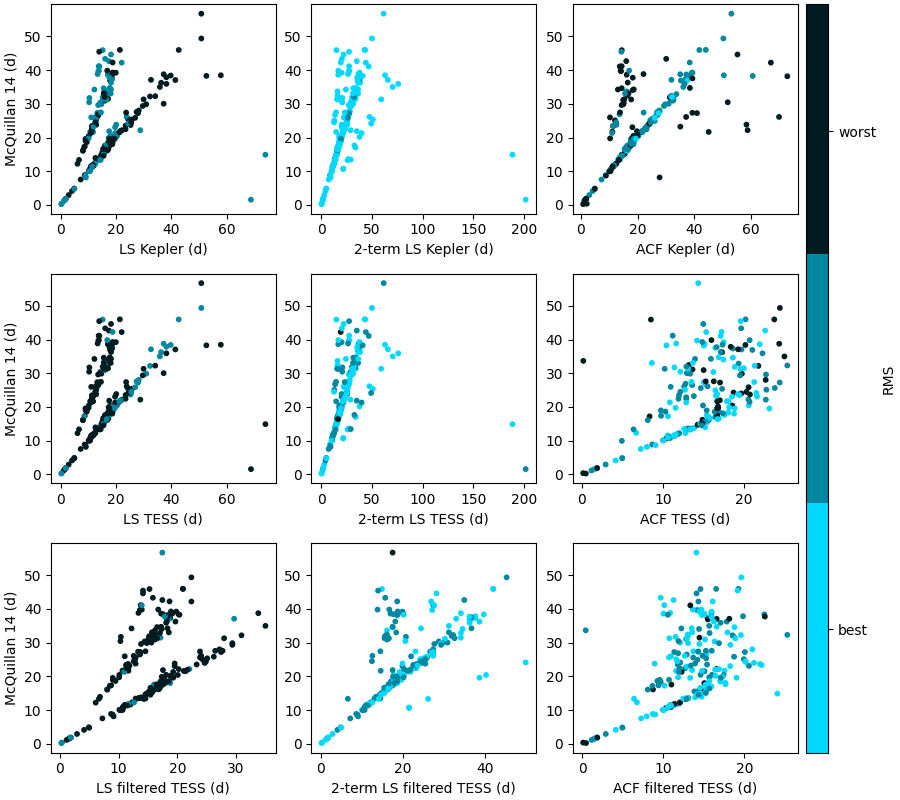

In [6]:
%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    GHIx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

colours = ax['A'].scatter(ls_kep, p_r, s=10, c=ls_kep_rms_col, vmin=1, vmax=3, cmap=ranker)#, norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['A'].set(xlabel='LS Kepler (d)', ylabel='McQuillan 14 (d)')

ax['B'].scatter(ls_kep2, p_r, s=10, c=ls_kep2_rms_col, vmin=1, vmax=3, cmap=ranker)#, norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['B'].set(xlabel='2-term LS Kepler (d)')

ax['C'].scatter(acf_kep, p_r, s=10, c=acf_kep_rms_col, vmin=1, vmax=3, cmap=ranker)#, norm=cl.LogNorm(vmin=rmsmin, vmax=rmsmax))
ax['C'].set(xlabel='ACF Kepler (d)')

ax['D'].scatter(ls_tess, p_r, s=10, c=ls_tess_rms_col, vmin=1, vmax=3, cmap=ranker)
ax['D'].set(xlabel='LS TESS (d)', ylabel='McQuillan 14 (d)')

ax['E'].scatter(ls_tess2, p_r, s=10, c=ls_tess2_rms_col, vmin=1, vmax=3, cmap=ranker)
ax['E'].set(xlabel='2-term LS TESS (d)')

ax['F'].scatter(acf_tess, p_r, s=10, c=acf_tess_rms_col, vmin=1, vmax=3, cmap=ranker)
ax['F'].set(xlabel='ACF TESS (d)')

ax['G'].scatter(ls_butter, p_r, s=10, c=ls_butter_rms_col, vmin=1, vmax=3, cmap=ranker)
ax['G'].set(xlabel='LS filtered TESS (d)', ylabel='McQuillan 14 (d)')

ax['H'].scatter(ls_butter2, p_r, s=10, c=ls_butter2_rms_col, vmin=1, vmax=3, cmap=ranker)
ax['H'].set(xlabel='2-term LS filtered TESS (d)')

ax['I'].scatter(acf_butter, p_r, s=10, c=acf_butter_rms_col, vmin=1, vmax=3, cmap=ranker)
ax['I'].set(xlabel='ACF filtered TESS (d)')

cb = plt.colorbar(colours, cax=ax['x'], ticks=[1.33, 2.66])
cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('RMS')

fig.set_size_inches(9,8)

<IPython.core.display.Javascript object>


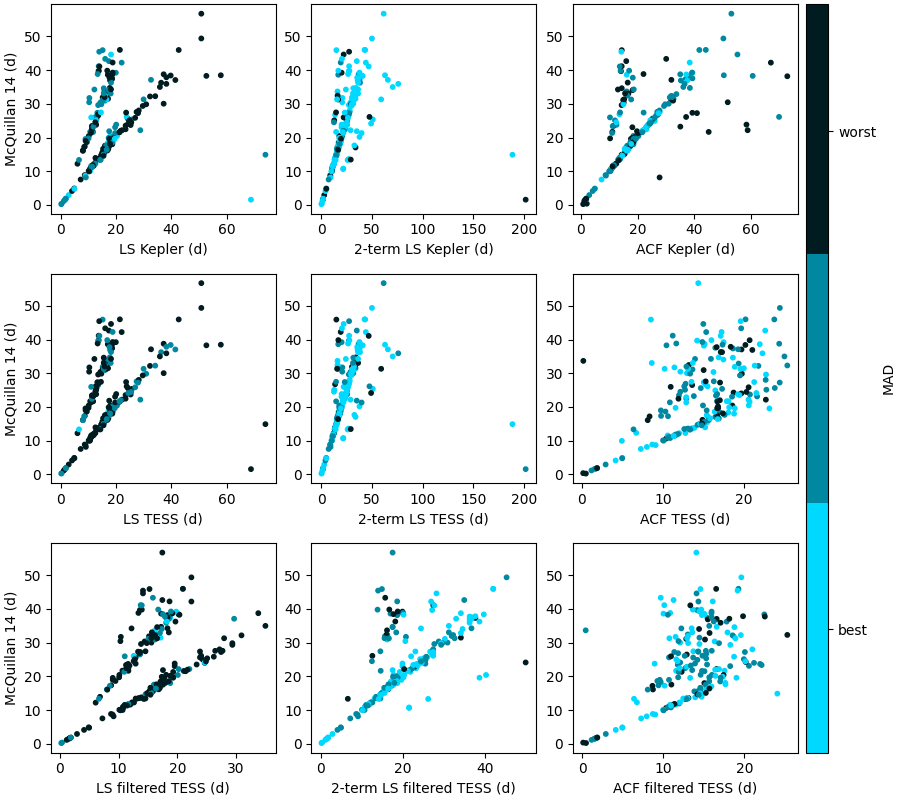

In [7]:
%matplotlib notebook
mosaic = """
    ABCx
    DEFx
    GHIx
    """

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic, gridspec_kw={"width_ratios":[1,1,1,0.1]})

colours = ax['A'].scatter(ls_kep, p_r, s=10, c=ls_kep_mad_col, vmin=1, vmax=3, cmap=ranker)#, norm=cl.LogNorm(vmin=madmin, vmax=madmax))
ax['A'].set(xlabel='LS Kepler (d)', ylabel='McQuillan 14 (d)')

ax['B'].scatter(ls_kep2, p_r, s=10, c=ls_kep2_mad_col, vmin=1, vmax=3, cmap=ranker)#, norm=cl.LogNorm(vmin=madmin, vmax=madmax))
ax['B'].set(xlabel='2-term LS Kepler (d)')

ax['C'].scatter(acf_kep, p_r, s=10, c=acf_kep_mad_col, vmin=1, vmax=3, cmap=ranker)#, norm=cl.LogNorm(vmin=madmin, vmax=madmax))
ax['C'].set(xlabel='ACF Kepler (d)')

ax['D'].scatter(ls_tess, p_r, s=10, c=ls_tess_mad_col, vmin=1, vmax=3, cmap=ranker)
ax['D'].set(xlabel='LS TESS (d)', ylabel='McQuillan 14 (d)')

ax['E'].scatter(ls_tess2, p_r, s=10, c=ls_tess2_mad_col, vmin=1, vmax=3, cmap=ranker)
ax['E'].set(xlabel='2-term LS TESS (d)')

ax['F'].scatter(acf_tess, p_r, s=10, c=acf_tess_mad_col, vmin=1, vmax=3, cmap=ranker)
ax['F'].set(xlabel='ACF TESS (d)')

ax['G'].scatter(ls_butter, p_r, s=10, c=ls_butter_mad_col, vmin=1, vmax=3, cmap=ranker)
ax['G'].set(xlabel='LS filtered TESS (d)', ylabel='McQuillan 14 (d)')

ax['H'].scatter(ls_butter2, p_r, s=10, c=ls_butter2_mad_col, vmin=1, vmax=3, cmap=ranker)
ax['H'].set(xlabel='2-term LS filtered TESS (d)')

ax['I'].scatter(acf_butter, p_r, s=10, c=acf_butter_mad_col, vmin=1, vmax=3, cmap=ranker)
ax['I'].set(xlabel='ACF filtered TESS (d)')

cb = plt.colorbar(colours, cax=ax['x'], ticks=[1.33, 2.66])
cb.ax.set_yticklabels(['best', 'worst'])
cb.ax.set_ylabel('MAD')

fig.set_size_inches(9,8)

<IPython.core.display.Javascript object>


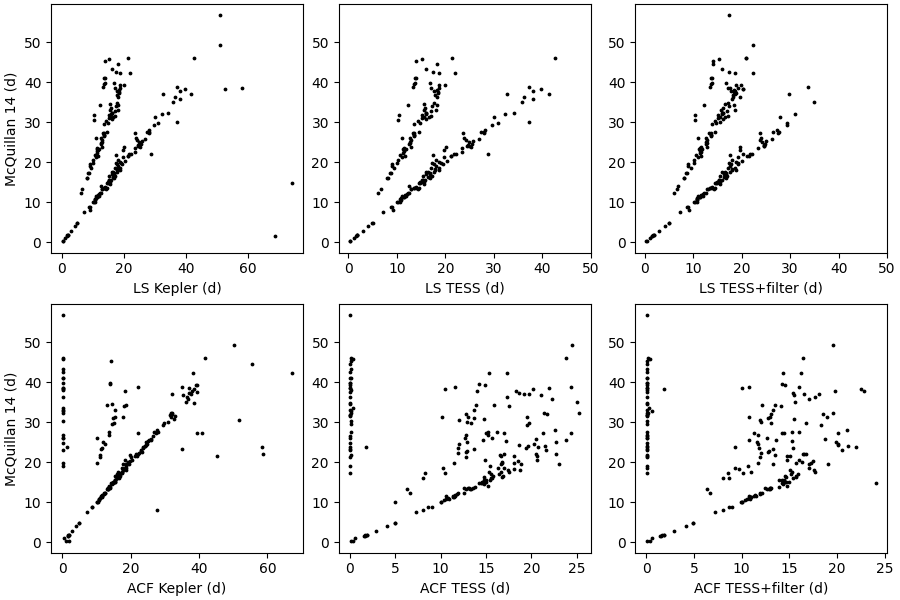

[Text(0.5, 0, 'ACF TESS+filter (d)')]

In [41]:
%matplotlib notebook
fig = plt.figure(figsize=(9,6), constrained_layout=True)
grid = gs.GridSpec(2,3, figure=fig)

ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])
ax5 = fig.add_subplot(grid[0,2])
ax6 = fig.add_subplot(grid[1,2])

ax1.scatter(ls_kep, p_r, s=3, c='k')
ax1.set(xlabel='LS Kepler (d)', ylabel='McQuillan 14 (d)')

ax2.scatter(ls_tess, p_r, s=3, c='k')
ax2.set(xlabel='LS TESS (d)', xlim=(-2,50))

ax3.scatter(acf_kep, p_r, s=3, c='k')
ax3.set(xlabel='ACF Kepler (d)', ylabel='McQuillan 14 (d)')

ax4.scatter(acf_tess, p_r, s=3, c='k')
ax4.set(xlabel='ACF TESS (d)')

ax5.scatter(ls_butter, p_r, s=3, c='k')
ax5.set(xlabel='LS TESS+filter (d)', xlim=(-2,50))

ax6.scatter(acf_butter, p_r, s=3, c='k')
ax6.set(xlabel='ACF TESS+filter (d)')

<IPython.core.display.Javascript object>


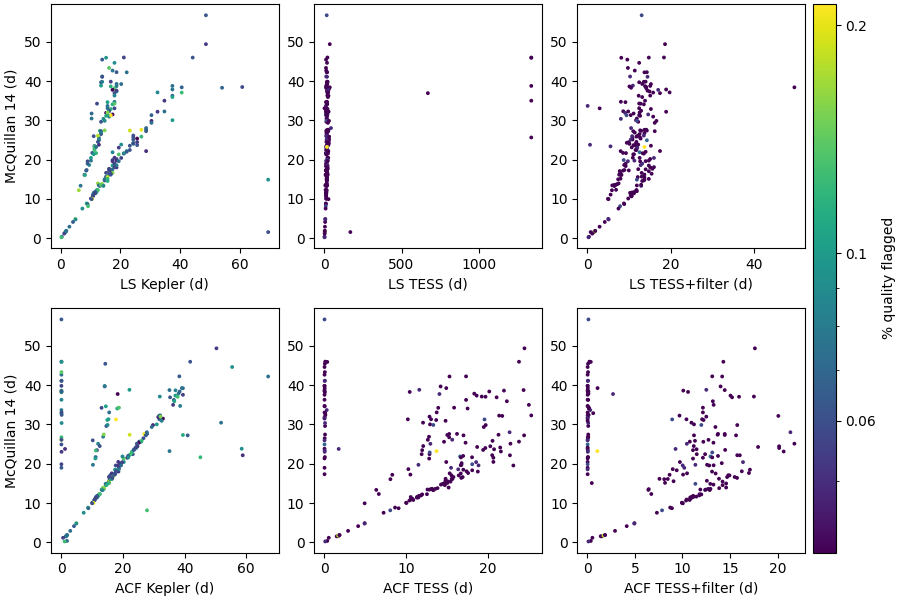

[Text(1, 0.06, '0.06'), Text(1, 0.1, '0.1'), Text(1, 0.2, '0.2')]

In [12]:
%matplotlib notebook
fig = plt.figure(figsize=(9,6), constrained_layout=True)
grid = gs.GridSpec(2,4, figure=fig, width_ratios=[1,1,1,0.1])

ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])
ax5 = fig.add_subplot(grid[0,2])
ax6 = fig.add_subplot(grid[1,2])
cax = fig.add_subplot(grid[:,3])

get_colors = ax1.scatter(ls_kep, p_r, c=qual_kep, s=3, norm=cl.LogNorm())
ax1.set(xlabel='LS Kepler (d)', ylabel='McQuillan 14 (d)')

ax2.scatter(ls_tess, p_r, c=qual_tess, s=3, norm=cl.LogNorm())
ax2.set(xlabel='LS TESS (d)')

ax3.scatter(acf_kep, p_r, c=qual_kep, s=3, norm=cl.LogNorm())
ax3.set(xlabel='ACF Kepler (d)', ylabel='McQuillan 14 (d)')

ax4.scatter(acf_tess, p_r, c=qual_tess, s=3, norm=cl.LogNorm())
ax4.set(xlabel='ACF TESS (d)')

ax5.scatter(ls_butter, p_r, c=qual_tess, s=3, norm=cl.LogNorm())
ax5.set(xlabel='LS TESS+filter (d)')

ax6.scatter(acf_butter, p_r, c=qual_tess, s=3, norm=cl.LogNorm())
ax6.set(xlabel='ACF TESS+filter (d)')

cb = Colorbar(ax=cax, mappable=get_colors, ticks=[0.06,0.1,0.2])
cb.set_label('% quality flagged')
cb.ax.set_yticklabels([0.06,0.1,0.2])

<IPython.core.display.Javascript object>


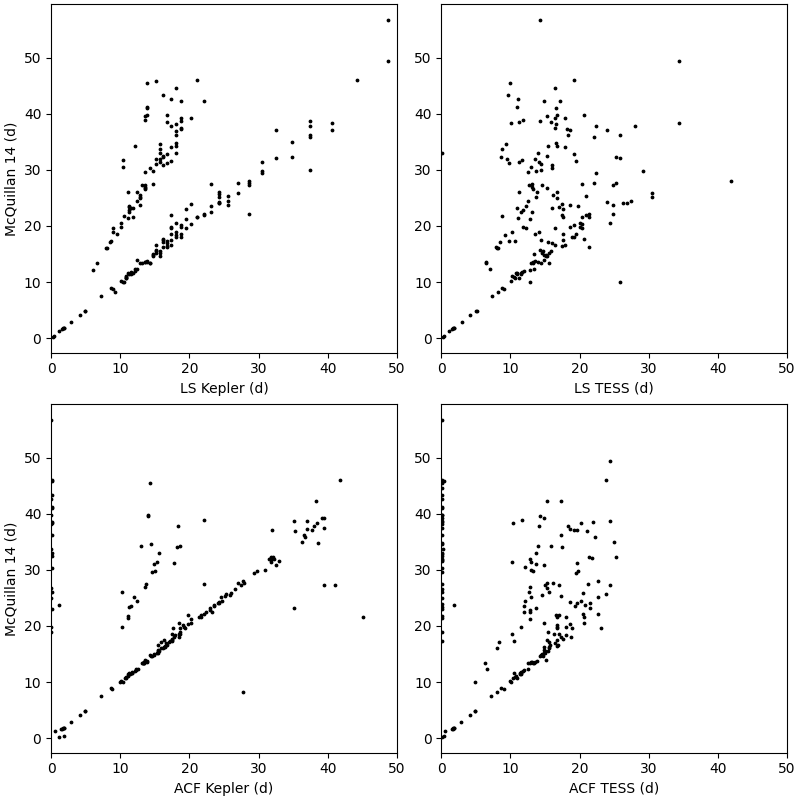

[Text(0.5, 0, 'ACF TESS (d)'), (0.0, 50.0)]

In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8), constrained_layout=True)
grid = gs.GridSpec(2,2, figure=fig)

ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])

ax1.scatter(ls_kep, p_r, c='k', s=3)
ax1.set(xlabel='LS Kepler (d)', ylabel='McQuillan 14 (d)', xlim=(0,50))

ax2.scatter(ls_tess, p_r, c='k', s=3)
ax2.set(xlabel='LS TESS (d)', xlim=(0,50))

ax3.scatter(acf_kep, p_r, c='k', s=3)
ax3.set(xlabel='ACF Kepler (d)', ylabel='McQuillan 14 (d)', xlim=(0,50))

ax4.scatter(acf_tess, p_r, c='k', s=3)
ax4.set(xlabel='ACF TESS (d)', xlim=(0,50))